170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


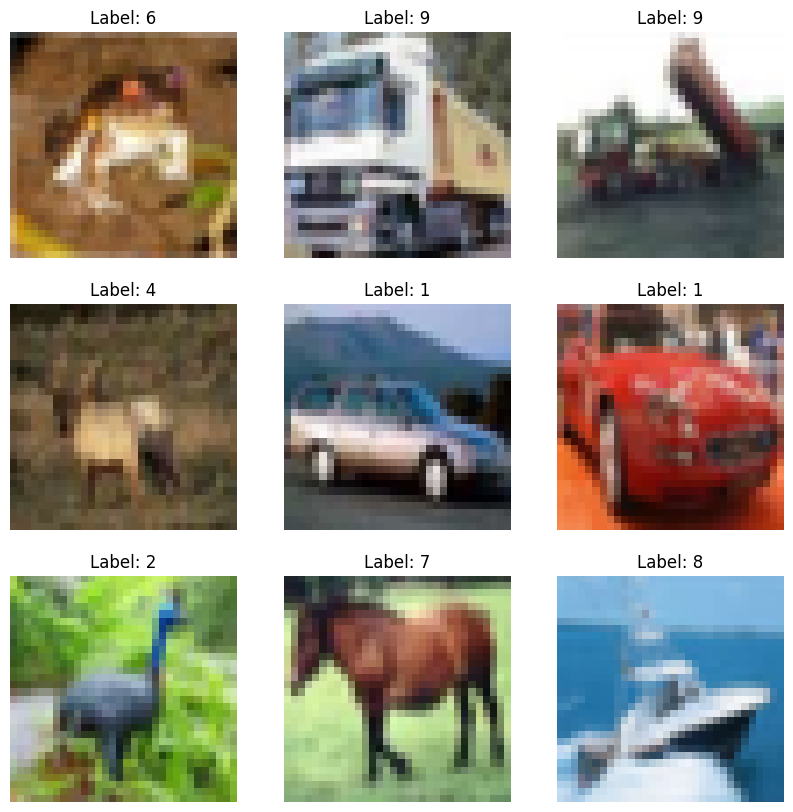

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1Φορτώνουμε το CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Εκτυπώνουμε το μέγεθος των δεδομένων
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Κανονικοποίηση δεδομένων

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Εμφανίζουμε μερικές εικόνες από το training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis("off")
plt.show()

In [ ]:
#2Δημιουργία του Validation Set (5% του train set)

# Ορίζουμε το ποσοστό για το validation set
validation_split = 0.05
num_train_samples = x_train.shape[0]
num_validation_samples = int(validation_split * num_train_samples)

# Δημιουργία του validation set (5% του train set)
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]

# Ενημέρωση του train set (αφαιρούμε τα δεδομένα που πήγαν στο validation set)
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

# Εκτύπωση του μεγέθους των νέων συνόλων
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")

x_train shape: (47500, 32, 32, 3), y_train shape: (47500, 1)
x_val shape: (2500, 32, 32, 3), y_val shape: (2500, 1)


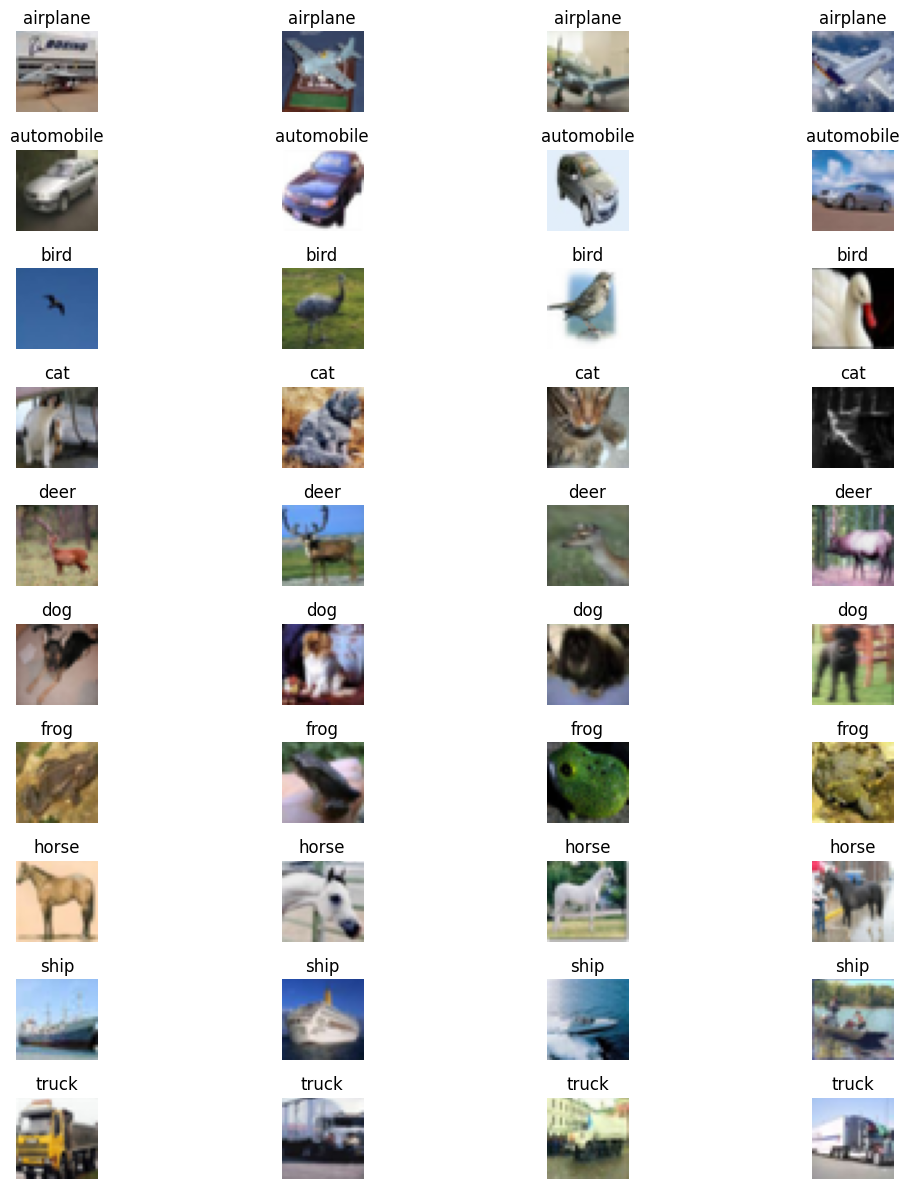

In [ ]:
#3Plot 4 τυχαίες εικόνες ανά κατηγορία από το training set

# Ορίζουμε τις 10 κατηγορίες του CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Δημιουργία του plot με 4 τυχαίες εικόνες ανά κατηγορία
plt.figure(figsize=(12, 12))

# Για κάθε κατηγορία
for i in range(10):
    # Βρίσκουμε τις εικόνες της κατηγορίας i
    indices = np.where(y_train == i)[0]

    # Επιλέγουμε 4 τυχαίες εικόνες
    random_indices = np.random.choice(indices, 4, replace=False)

    # Εμφανίζουμε τις εικόνες
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(x_train[idx])
        plt.title(class_names[i])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#4
# Ορίζουμε το μοντέλο του CNN
model = models.Sequential()

# Πρώτο Convolutional Layer (32 filters, 3x3 kernels, ReLU activation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Δεύτερο Convolutional Layer (64 filters, 3x3 kernels, ReLU activation)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Τρίτο Convolutional Layer (128 filters, 3x3 kernels, ReLU activation)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Flatten για να μετατραπούν οι 2D εξόδοι σε 1D για τα πλήρως συνδεδεμένα επίπεδα
model.add(layers.Flatten())

# Πρώτο fully connected layer (dense layer)
model.add(layers.Dense(128, activation='relu'))

# Έξοδος (10 κατηγορίες, softmax για ταξινόμηση πολλαπλών κατηγοριών)
model.add(layers.Dense(10, activation='softmax'))

# Σύνοψη του μοντέλου
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Data creation completed.
We have 47500 training samples of size: 32x32
CNN topology setup completed.
Training the model...
Epoch 1/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 65s 85ms/step - accuracy: 0.3086 - loss: 1.8517 - val_accuracy: 0.4920 - val_loss: 1.4069
Epoch 2/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.5501 - loss: 1.2660 - val_accuracy: 0.6016 - val_loss: 1.1060
Epoch 3/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6256 - loss: 1.0774 - val_accuracy: 0.6304 - val_loss: 1.0354
Epoch 4/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.6639 - loss: 0.9688 - val_accuracy: 0.6576 - val_loss: 0.9640
Epoch 5/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.6902 - loss: 0.8914 - val_accuracy: 0.6852 - val_loss: 0.9029
Epoch 6/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 59s 80ms/step - accuracy: 0.7204 - loss: 0.8110 - val_accuracy: 0.6984 - val_loss: 0.8839
Epoch 7/20
743/743 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.7364 - loss: 0.7600 - val_acc

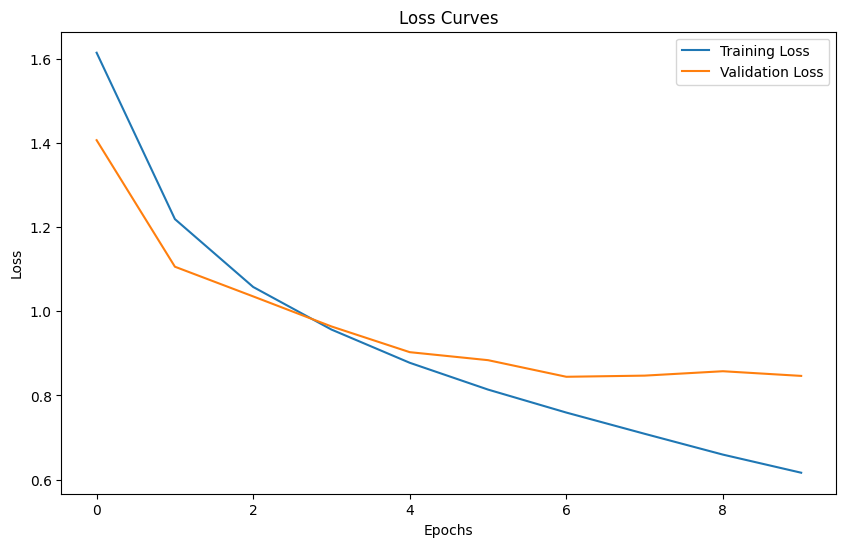

Mounted at /content/drive
Model saved to /content/drive/MyDrive/CNN_CIFAR10_model.h5


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import drive

# Καθορισμός του optimizer, της loss function και των metrics
model.compile(
    optimizer='adam',               # Χρησιμοποιούμε τον Adam optimizer
    loss='sparse_categorical_crossentropy',  # Χρησιμοποιούμε sparse categorical crossentropy loss για την ταξινόμηση πολλαπλών κατηγοριών
    metrics=['accuracy']            # Μετράμε την ακρίβεια κατά τη διάρκεια της εκπαίδευσης
)

# Εκτύπωση μηνύματος κατάστασης
print("Data creation completed.")
print(f"We have {x_train.shape[0]} training samples of size: {x_train.shape[1]}x{ x_train.shape[2]}")
print("CNN topology setup completed.")

# Ρυθμίζουμε το early stopping: θα σταματήσουμε την εκπαίδευση αν το validation loss δεν βελτιωθεί για 3 διαδοχικές εποχές
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Εκπαίδευση του μοντέλου
print("Training the model...")
history = model.fit(
    x_train, y_train,  # Δεδομένα εκπαίδευσης
    epochs=20,         # Μέγιστος αριθμός εποχών
    batch_size=64,     # Μέγεθος παρτίδας
    validation_data=(x_val, y_val),  # Δεδομένα επικύρωσης
    callbacks=[early_stopping],      # Χρησιμοποιούμε το early stopping
    verbose=1  # Εμφάνιση προόδου κατά την εκπαίδευση
)

# Εκτύπωση μηνύματος κατάστασης για την ολοκλήρωση της εκπαίδευσης
print("Model training completed.")


# Plot των loss curves (Training Loss και Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Συνδέουμε το Google Drive
drive.mount('/content/drive')

# Ορίζουμε τον φάκελο στον οποίο θα αποθηκεύσουμε το μοντέλο
model_save_path = '/content/drive/MyDrive/CNN_CIFAR10_model.h5'

# Αποθηκεύουμε το εκπαιδευμένο μοντέλο
model.save(model_save_path)

# Επιβεβαίωση αποθήκευσης
print(f"Model saved to {model_save_path}")


Model loaded successfully.
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step
Train Set - Accuracy: 0.7696, Precision: 0.7776, Recall: 0.7696, F1-Score: 0.7709
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Validation Set - Accuracy: 0.7136, Precision: 0.7227, Recall: 0.7136, F1-Score: 0.7150
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Test Set - Accuracy: 0.7038, Precision: 0.7121, Recall: 0.7038, F1-Score: 0.7048
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


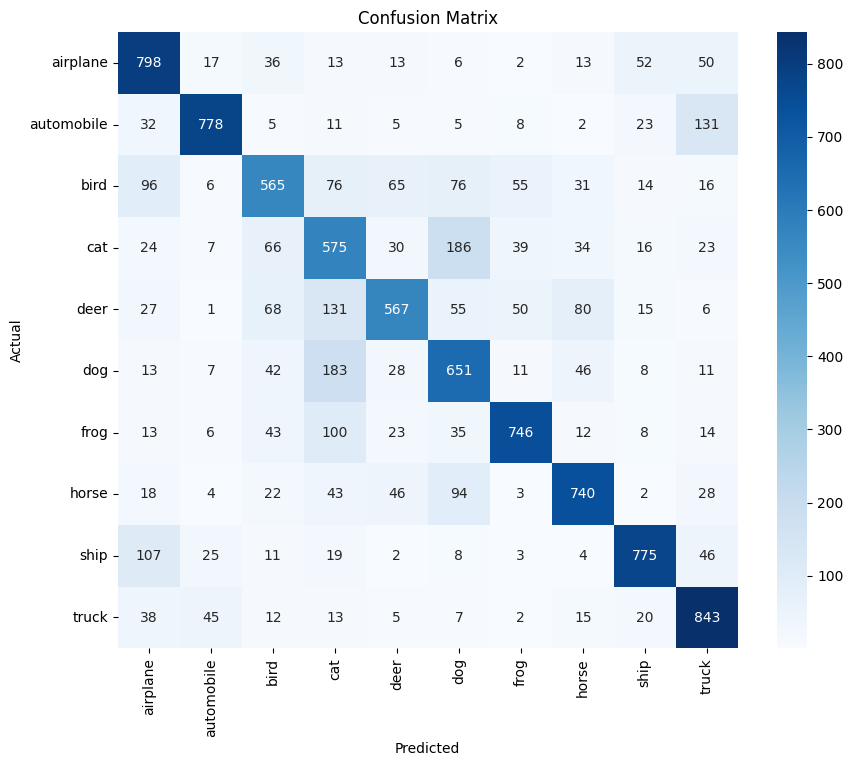

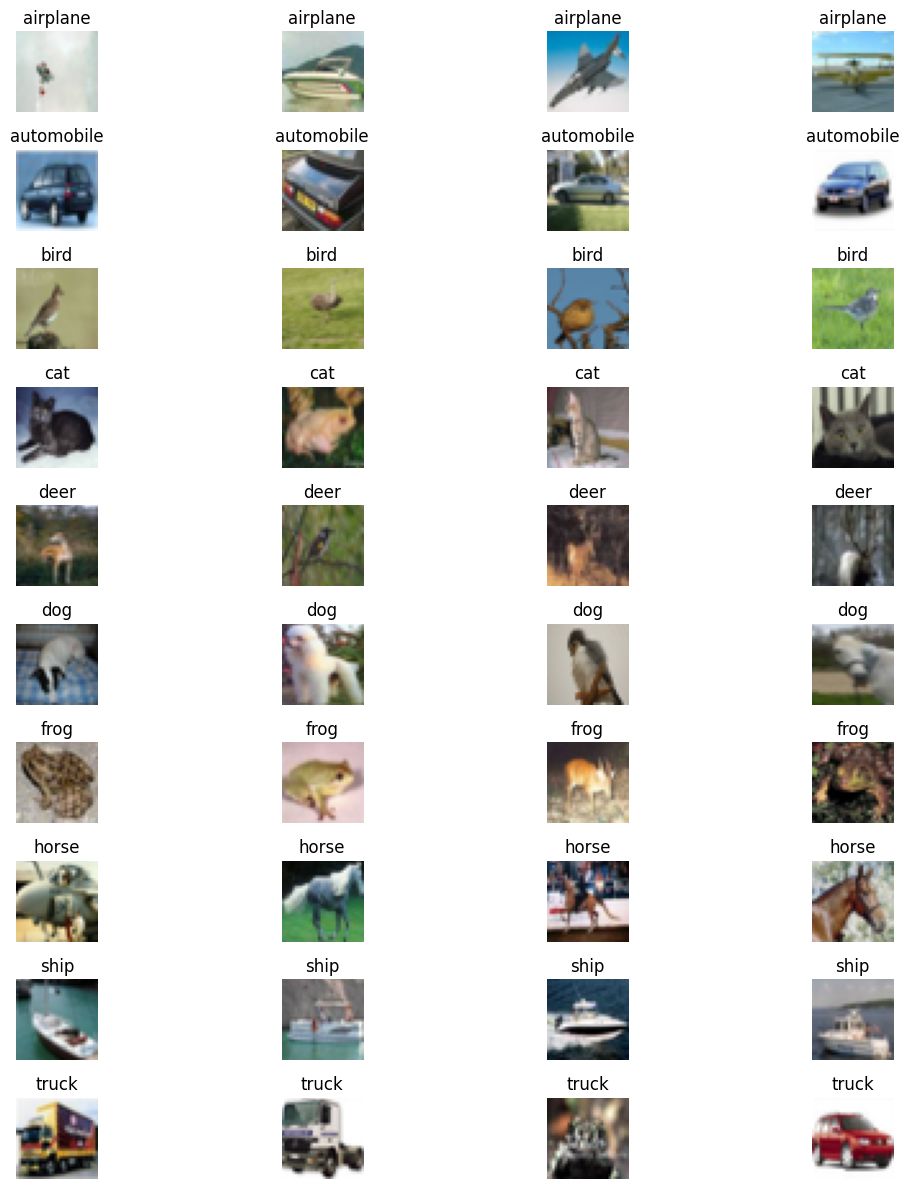

Fold 1/5


NameError: name 'create_cnn_model' is not defined

In [ ]:
#Αξιολόγηση του Μοντέλου

model = load_model(model_save_path)
print("Model loaded successfully.")
# Υπολογισμός metrics (Accuracy, Precision, Recall, F1-score)

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def evaluate_model(model, X, y, set_name):
    y_pred = np.argmax(model.predict(X), axis=1)
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')
    print(f"{set_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

evaluate_model(model, x_train, y_train, "Train Set")
evaluate_model(model, x_val, y_val, "Validation Set")
evaluate_model(model, x_test, y_test, "Test Set")
# Confusion Matrix

import seaborn as sns

y_test_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Plot 4 τυχαίων εικόνων ανά κατηγορία (με βάση το predicted class)

plt.figure(figsize=(12, 12))
for i in range(10):
    indices = np.where(y_test_pred == i)[0]
    random_indices = np.random.choice(indices, 4, replace=False)
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(x_test[idx])
        plt.title(class_names[i])
        plt.axis('off')
plt.tight_layout()
plt.show()
#Stratified 5-Fold και Καταχώρηση σε DataFrame

df_results = pd.DataFrame(columns=[
    'Classifier Name', 'Set', 'Num Samples', 'Accuracy', 'Precision', 'Recall', 'F1-Score'
])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_idx, val_idx in kf.split(x_train, y_train):
    print(f"Fold {fold}/5")
    fold_model = create_cnn_model()
    fold_model.fit(x_train[train_idx], y_train[train_idx], epochs=10, batch_size=64, verbose=0)

    for set_name, X, y in [('Train', x_train[train_idx], y_train[train_idx]),
                           ('Validation', x_train[val_idx], y_train[val_idx]),
                           ('Test', x_test, y_test)]:
        acc, prec, rec, f1 = evaluate_model(fold_model, X, y, set_name)
        df_results.loc[len(df_results)] = ['CNN', set_name, len(y), acc, prec, rec, f1]
    fold += 1

print(df_results)

In [ ]:
#7Φόρτωση του Εκπαιδευμένου Μοντέλου

from tensorflow.keras.models import load_model

# Φορτώνουμε το εκπαιδευμένο μοντέλο από το Google Drive
model_path = '/content/drive/MyDrive/CNN_CIFAR10_model.h5'
model = load_model(model_path)

# Εμφανίζουμε συνοπτικά το μοντέλο για επιβεβαίωση
model.summary()
#8-9 Εκτέλεση Stratified 5-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Δημιουργία ενός dataframe για να καταχωρήσουμε τα αποτελέσματα
results_df = pd.DataFrame(columns=[
    'Classifier Name', 'Set', 'Number of Samples', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Δεδομένα CIFAR-10
X = x_train
y = y_train

# Ορισμός για το test set (παραμένει το ίδιο σε κάθε fold)
X_test, y_test = x_test, y_test

# 5-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}/{5}")

    # Διαχωρισμός των δεδομένων σε train και validation set για αυτό το fold
    X_train_fold, y_train_fold = X[train_idx], y[train_idx]
    X_val_fold, y_val_fold = X[val_idx], y[val_idx]

    # Εκπαίδευση του μοντέλου για το τρέχον fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)

    # Εκτίμηση του μοντέλου για τα δεδομένα train, validation, και test
    for data_set, X_data, y_data in [
        ('Training', X_train_fold, y_train_fold),
        ('Validation', X_val_fold, y_val_fold),
        ('Test', X_test, y_test)
    ]:
        # Πρόβλεψη από το μοντέλο
        y_pred = model.predict(X_data)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Υπολογισμός των μετρικών
        accuracy = accuracy_score(y_data, y_pred_classes)
        precision = precision_score(y_data, y_pred_classes, average='weighted')
        recall = recall_score(y_data, y_pred_classes, average='weighted')
        f1 = f1_score(y_data, y_pred_classes, average='weighted')

        # Καταχώρηση των αποτελεσμάτων
        results_df = results_df.append({
            'Classifier Name': 'CNN',
            'Set': data_set,
            'Number of Samples': len(y_data),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }, ignore_index=True)

        # Εμφάνιση confusion matrix για το τρέχον set
        cm = confusion_matrix(y_data, y_pred_classes)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix - {data_set} Set (Fold {fold + 1})")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    print(f"Fold {fold + 1} results stored.")

# Εμφάνιση του dataframe με τα αποτελέσματα
print("\nResults from all folds:")
print(results_df)

#10 Plot Τυχαίες Εικόνες Ανά Κατηγορία Βασισμένες Στις Προβλέψεις
# Στην κατηγορία βασισμένη στην πρόβλεψη του CNN
for i in range(10):
    # Βρίσκουμε τις εικόνες που το μοντέλο έχει προβλέψει για την κατηγορία i
    predicted_indices = np.where(y_pred_classes == i)[0]

    # Επιλέγουμε 4 τυχαίες εικόνες
    random_indices = np.random.choice(predicted_indices, 4, replace=False)

    # Εμφανίζουμε τις εικόνες
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(X[idx])
        plt.title(class_names[i])
        plt.axis('off')

plt.tight_layout()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,204 (625.80 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Fold 1/5


ValueError: Unknown variable: <KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential/conv2d/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

παλιιιι

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from google.colab import drive

# Σύνδεση στο Google Drive
drive.mount('/content/drive')

# Φόρτωση δεδομένων
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Κανονικοποίηση των δεδομένων
x_train, x_test = x_train / 255.0, x_test / 255.0

# Σχήμα δεδομένων
print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training data shape: (50000, 32, 32, 3), Test data shape: (10000, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# Δημιουργία validation set (5% του train set)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.05, stratify=y_train, random_state=42)

print(f"Train set: {x_train.shape}, Validation set: {x_val.shape}, Test set: {x_test.shape}")


Train set: (47500, 32, 32, 3), Validation set: (2500, 32, 32, 3), Test set: (10000, 32, 32, 3)


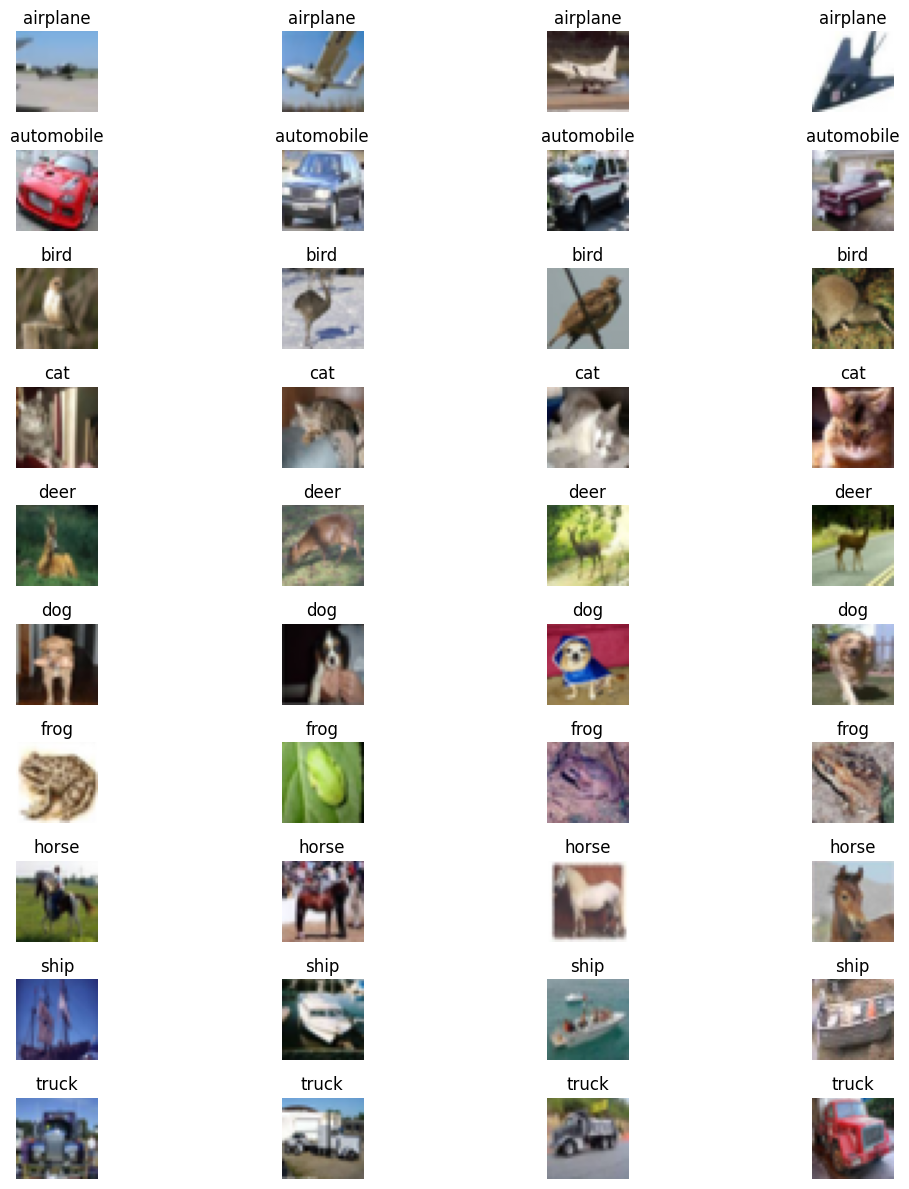

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 12))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 4, replace=False)
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(x_train[idx])
        plt.title(class_names[i])
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 109s 144ms/step - accuracy: 0.3367 - loss: 1.7937 - val_accuracy: 0.5432 - val_loss: 1.2821
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 98s 86ms/step - accuracy: 0.5543 - loss: 1.2434 - val_accuracy: 0.6020 - val_loss: 1.1563
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6344 - loss: 1.0514 - val_accuracy: 0.6636 - val_loss: 0.9981
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6808 - loss: 0.9216 - val_accuracy: 0.6840 - val_loss: 0.9377
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7093 - loss: 0.8396 - val_accuracy: 0.6976 - val_loss: 0.9003
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.7308 - loss: 0.7692 - val_accuracy: 0.7072 - val_loss: 0.8674
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.7538 - loss: 0.7040 - val_accuracy: 0.7032 - val_loss: 0.8647
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7729 - loss: 0.6546 

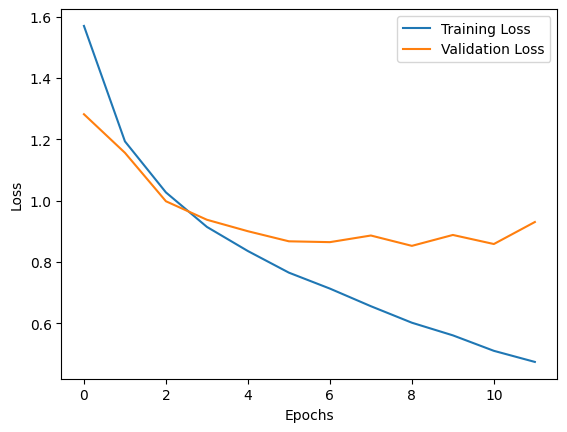

Model saved to /content/drive/MyDrive/CNN_CIFAR10_model.h5


In [ ]:
model = create_cnn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot των loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Αποθήκευση του μοντέλου
model_path = '/content/drive/MyDrive/CNN_CIFAR10_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")


In [ ]:
#Βήμα 7: Φόρτωση του αποθηκευμένου μοντέλου

model = load_model(model_path)
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
#Βήμα 8: Υπολογισμός metrics (Accuracy, Precision, Recall, F1-score)

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def evaluate_model(model, X, y, set_name):
    y_pred = np.argmax(model.predict(X), axis=1)
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')
    print(f"{set_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

evaluate_model(model, x_train, y_train, "Train Set")
evaluate_model(model, x_val, y_val, "Validation Set")
evaluate_model(model, x_test, y_test, "Test Set")


1485/1485 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step
Train Set - Accuracy: 0.8226, Precision: 0.8303, Recall: 0.8226, F1-Score: 0.8240
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Validation Set - Accuracy: 0.7132, Precision: 0.7227, Recall: 0.7132, F1-Score: 0.7152
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Test Set - Accuracy: 0.7149, Precision: 0.7255, Recall: 0.7149, F1-Score: 0.7165


(0.7149, 0.7255372461410374, 0.7149, 0.7165001115828076)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


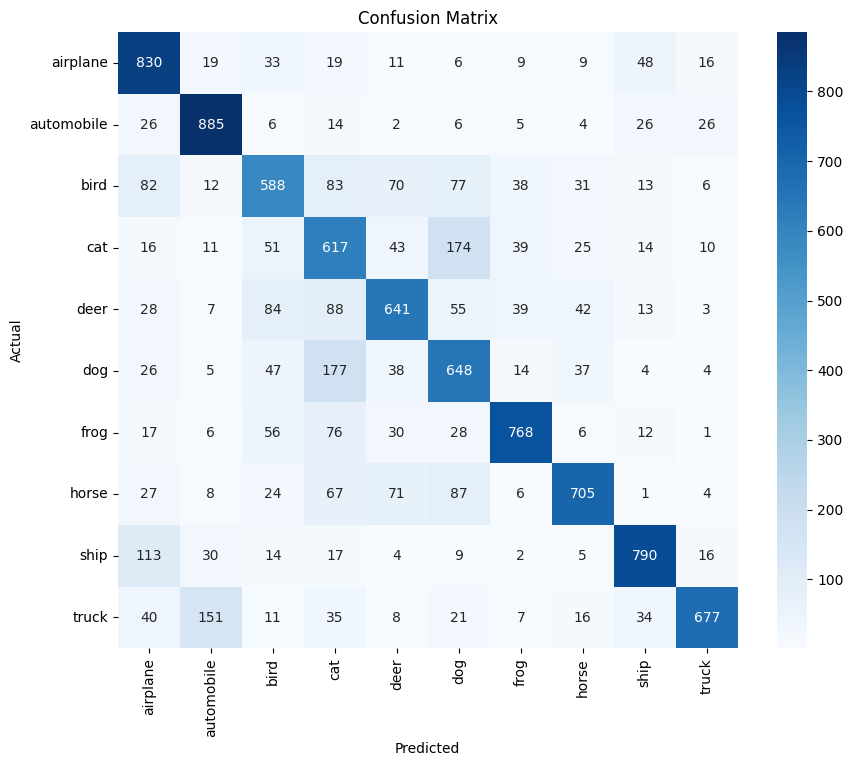

In [ ]:
#Βήμα 9: Confusion Matrix

import seaborn as sns

y_test_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


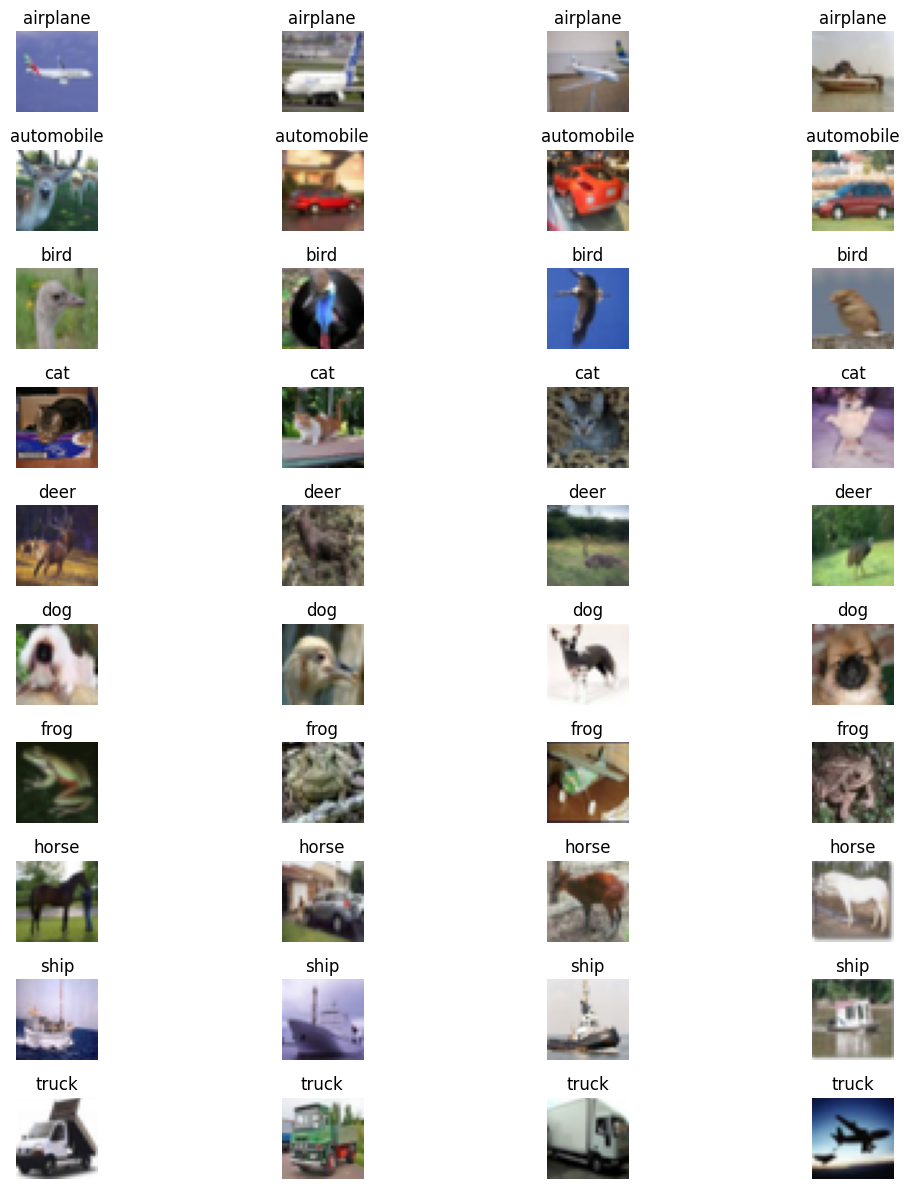

In [ ]:
#Βήμα 10: Plot 4 τυχαίων εικόνων ανά κατηγορία (με βάση το predicted class)

plt.figure(figsize=(12, 12))
for i in range(10):
    indices = np.where(y_test_pred == i)[0]
    random_indices = np.random.choice(indices, 4, replace=False)
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(x_test[idx])
        plt.title(class_names[i])
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#Stratified 5-Fold και Καταχώρηση σε DataFrame

df_results = pd.DataFrame(columns=[
    'Classifier Name', 'Set', 'Num Samples', 'Accuracy', 'Precision', 'Recall', 'F1-Score'
])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_idx, val_idx in kf.split(x_train, y_train):
    print(f"Fold {fold}/5")
    fold_model = create_cnn_model()
    fold_model.fit(x_train[train_idx], y_train[train_idx], epochs=10, batch_size=64, verbose=0)

    for set_name, X, y in [('Train', x_train[train_idx], y_train[train_idx]),
                           ('Validation', x_train[val_idx], y_train[val_idx]),
                           ('Test', x_test, y_test)]:
        acc, prec, rec, f1 = evaluate_model(fold_model, X, y, set_name)
        df_results.loc[len(df_results)] = ['CNN', set_name, len(y), acc, prec, rec, f1]
    fold += 1

print(df_results)

Fold 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step
Train - Accuracy: 0.7874, Precision: 0.8062, Recall: 0.7874, F1-Score: 0.7863
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Validation - Accuracy: 0.6903, Precision: 0.7105, Recall: 0.6903, F1-Score: 0.6878
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Test - Accuracy: 0.6911, Precision: 0.7090, Recall: 0.6911, F1-Score: 0.6878
Fold 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step
Train - Accuracy: 0.7979, Precision: 0.8100, Recall: 0.7979, F1-Score: 0.7991
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Validation - Accuracy: 0.7019, Precision: 0.7153, Recall: 0.7019, F1-Score: 0.7029
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Test - Accuracy: 0.6921, Precision: 0.7063, Recall: 0.6921, F1-Score: 0.6935
Fold 3/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step
Train - Accuracy: 0.8028, Precision: 0.8120, Recall: 0.8028, F1-Score: 0.8013
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Validation - Accuracy: 0.6973, Precision: 0.7074, Recall: 0.6973, F1-Score: 0.6942
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Test - Accuracy: 0.6927, Precision: 0.7005, Recall: 0.6927, F1-Score: 0.6898
Fold 4/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step
Train - Accuracy: 0.8187, Precision: 0.8221, Recall: 0.8187, F1-Score: 0.8178
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Validation - Accuracy: 0.6961, Precision: 0.7015, Recall: 0.6961, F1-Score: 0.6950
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Test - Accuracy: 0.6991, Precision: 0.7058, Recall: 0.6991, F1-Score: 0.6985
Fold 5/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step
Train - Accuracy: 0.8232, Precision: 0.8273, Recall: 0.8232, F1-Score: 0.8214
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Validation - Accuracy: 0.6993, Precision: 0.7009, Recall: 0.6993, F1-Score: 0.6959
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Test - Accuracy: 0.6983, Precision: 0.7001, Recall: 0.6983, F1-Score: 0.6942
   Classifier Name         Set  Num Samples  Accuracy  Precision    Recall  \
0              CNN       Train        38000  0.787447   0.806250  0.787447   
1              CNN  Validation         9500  0.690316   0.710530  0.690316   
2              CNN        Test        10000  0.691100   0.709014  0.691100   
3              CNN       Train        38000  0.797947   0.810037  0.797947   
4              CNN  Validation         9500  0.701895   0.715259  0.701895   
5              CNN        Test        10000  0.692100   0.706348  0.692100   
6              CNN       Train        38000  0.802763   0.812013  0.802763   
7        